In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from io import StringIO
from transformers import CLIPTokenizer
import os

/Users/wery/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Calculate the number of documents in the dataset

In [10]:
# Total: 4202

data = """
video,images
ACCFP,42
CCAH,30
CCSAD,59
CCUIM,48
EIB,45
EWCC,49
GGCC,52
SCCC,34
TICC,31
WICC,30
"""

df = pd.read_csv(StringIO(data))

total_images = df['images'].sum()

print(f"The total number of images is: {total_images}")

The total number of images is: 420


In [14]:
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

dataset_root = "../dataset"

test_videos = ['ACCFP', 'CCAH', 'CCSAD', 'CCUIM', 'EIB', 'EWCC', 'GGCC', 'SCCC', 'TICC', 'WICC']
val_videos = ['CCGFS', 'CCIAP', 'CICC', 'EFCC', 'FIJI', 'HCCAB', 'HRDCC', 'HUSNS', 'MACC', 'SAPFS']
train_videos = [
    'ACCC', 'AIAQ', 'AIDT', 'AMCC', 'BDCC', 'BECCC', 'BWFF', 'CBAQC', 'CCBN', 'CCBNN',
    'CCCBL', 'CCCP', 'CCCS', 'CCD', 'CCFS', 'CCFWW', 'CCH', 'CCHES', 'CCIAA', 'CCIAH', 'CCICD',
    'CCIS', 'CCISL', 'CCMA', 'CCSC', 'CCTA', 'CCTP', 'CCWC', 'CCWQ', 'CESS', 'COP',
    'CPCC', 'CTCM', 'DACC', 'DFCC', 'DPIC', 'DTECC', 'ECCDS', 'FCC', 'FLW', 'FTACC',
    'HCCAE', 'HCCAW', 'HCCIG', 'HCI', 'HDWC', 'HHVBD', 'HSHWA', 'HSPW', 'IMRF', 'INCAS',
    'MICC', 'NASA', 'OCCC', 'PCOCC', 'PWCCA', 'RAGG', 'RASCC', 'RCCCS', 'RCCS', 'RHTCC',
    'RPDCC', 'SDDA', 'SLCCA', 'SSTCC', 'TCBCC', 'TECCC', 'TIOCC', 'TIYH', 'TTFCC',
    'TUCC', 'UKCC', 'VFVCC', 'VPCC', 'WCCA', 'WFHSW', 'WICCE', 'WISE', 'WTCC', 'YPTL'
]

def print_tokens_per_line_and_max_clip(videos, dataset_root, tokenizer):
    for video in videos:
        csv_path = os.path.join(dataset_root, video, f"{video}.csv")
        if os.path.exists(csv_path):
            data = pd.read_csv(csv_path, header=None, skiprows=1, names=['label', 'text'])
            print(f"\nVideo Name: {video}")
            max_tokens = 0
            for index, row in data.iterrows():
                tokens = tokenizer.encode(row['text'], add_special_tokens=False)
                token_count = len(tokens)
                max_tokens = max(max_tokens, token_count)
                print(f"{token_count} token{'s' if token_count != 1 else ''},", end=" ")
            print(f"\nMaximum tokens in this video: {max_tokens}")
        else:
            print(f"CSV file for {video} not found.")

print_tokens_per_line_and_max_clip(test_videos, dataset_root, tokenizer)
print_tokens_per_line_and_max_clip(val_videos, dataset_root, tokenizer)
print_tokens_per_line_and_max_clip(train_videos, dataset_root, tokenizer)

/Users/wery/Library/Python/3.9/lib/python/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (82 > 77). Running this sequence through the model will result in indexing errors



Video Name: ACCFP
9 tokens, 3 tokens, 3 tokens, 3 tokens, 18 tokens, 18 tokens, 35 tokens, 35 tokens, 35 tokens, 42 tokens, 42 tokens, 42 tokens, 3 tokens, 24 tokens, 24 tokens, 21 tokens, 21 tokens, 3 tokens, 40 tokens, 40 tokens, 40 tokens, 40 tokens, 21 tokens, 21 tokens, 21 tokens, 19 tokens, 19 tokens, 6 tokens, 25 tokens, 25 tokens, 25 tokens, 24 tokens, 24 tokens, 3 tokens, 31 tokens, 31 tokens, 34 tokens, 34 tokens, 34 tokens, 3 tokens, 3 tokens, 3 tokens, 
Maximum tokens in this video: 42

Video Name: CCAH
12 tokens, 13 tokens, 9 tokens, 15 tokens, 23 tokens, 15 tokens, 13 tokens, 13 tokens, 5 tokens, 13 tokens, 12 tokens, 16 tokens, 23 tokens, 7 tokens, 10 tokens, 14 tokens, 15 tokens, 23 tokens, 8 tokens, 15 tokens, 11 tokens, 21 tokens, 12 tokens, 9 tokens, 16 tokens, 11 tokens, 8 tokens, 5 tokens, 3 tokens, 3 tokens, 
Maximum tokens in this video: 23

Video Name: CCSAD
6 tokens, 0 tokens, 24 tokens, 24 tokens, 16 tokens, 9 tokens, 18 tokens, 24 tokens, 24 tokens, 11 token

## Average accuracy and f1

In [8]:
path = '../results/BERT_test_results.csv'
data = pd.read_csv(path, header=None, skiprows=1, names=['accuracy', 'f1']) 
data

,accuracy,f1
ACCFP,0.05,0.00
CCAH,0.50,0.34
CCSAD,0.44,0.28
CCUIM,0.42,0.26
EIB,0.02,0.04
EWCC,0.59,0.44
GGCC,0.40,0.38
SCCC,0.41,0.38
TICC,0.26,0.13
WICC,0.43,0.26


In [9]:
average_accuracy = data['accuracy'].mean()
std_accuracy = data['accuracy'].std()
average_f1 = data['f1'].mean()
std_f1 = data['f1'].std()

print(average_accuracy, average_f1)
print(std_accuracy, std_f1)

0.352 0.251
0.18635688581023477 0.14910473574713254


## Llama3 accuracy of prediction & ground truth

In [8]:
videos = ["ACCFP", "CCAH", "CCSAD", "CCUIM", "EIB", "EWCC", "GGCC", "SCCC", "TICC", "WICC"]

all_results = pd.DataFrame()

for video in videos:
    predictions = pd.read_csv(f'dataset/{video}/{video}_predicted.csv', header=None, skiprows=1, names=['label', 'text', 'predicted_label'])
    true_labels = predictions['label']
    predictions = predictions['predicted_label']

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    accuracy = round(accuracy, 2)
    f1 = round(f1, 2)

    results = pd.DataFrame({
        'video': [video],
        'accuracy': [accuracy],
        'f1': [f1],
    })
    
    all_results = pd.concat([all_results, results], ignore_index=True)

filename='results/llama3_test_results.csv'
if os.path.exists(filename):
        all_results.to_csv(filename, mode='a', header=False, index=False)
else:
    all_results.to_csv(filename, mode='w', header=True, index=False)

## Gemma2 results and CSV file

In [9]:
videos = ["ACCFP", "CCAH", "CCSAD", "CCUIM", "EIB", "EWCC", "GGCC", "SCCC", "TICC", "WICC"]

all_results = pd.DataFrame()

for video in videos:
    predictions = pd.read_csv(f'dataset/{video}/{video}_gemma2.csv', header=None, skiprows=1, names=['label', 'text', 'predicted_label'])
    true_labels = predictions['label']
    predictions = predictions['predicted_label']

    accuracy = accuracy_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, average='weighted')
    accuracy = round(accuracy, 2)
    f1 = round(f1, 2)

    results = pd.DataFrame({
        'video': [video],
        'accuracy': [accuracy],
        'f1': [f1],
    })
    
    all_results = pd.concat([all_results, results], ignore_index=True)

filename='results/gemma2_test_results.csv'
if os.path.exists(filename):
        all_results.to_csv(filename, mode='a', header=False, index=False)
else:
    all_results.to_csv(filename, mode='w', header=True, index=False)

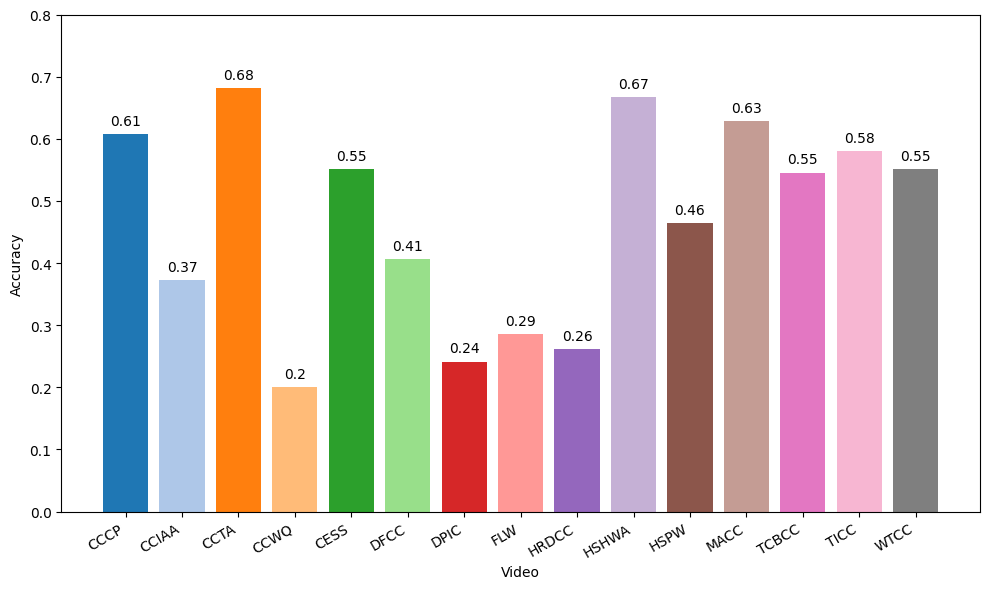

In [63]:
df = pd.read_csv(filename)
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20.colors 

bars = plt.bar(df['video'], df['accuracy'], color=colors[:15])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Video')
plt.ylabel('Accuracy')
# plt.title('Accuracy of Different Videos')
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 0.8) 

plt.tight_layout()
plt.savefig('results/llama_acc.pdf')
plt.show()

In [62]:
df['accuracy'].mean()

0.4697223361203041

In [64]:
df['baseline'].mean()

0.15999999999999998